# Prediccion con series de tiempo

**Data: oilfilters**

In [1]:
library(TSA)
library(tseries)


Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [2]:
data('oilfilters')

In [3]:
oilfilters

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1983,,,,,,,2385,3302,3958,3302,2441,3107
1984,5862,4536,4625,4492,4486,4005,3744,2546,1954,2285,1778,3222
1985,5472,5310,1965,3791,3622,3726,3370,2535,1572,2146,2249,1721
1986,5357,5811,2436,4608,2871,3349,2909,2324,1603,2148,2245,1586
1987,5332,5787,2886,5475,3843,2537,,,,,,


## Estacionariedad

**Descriptiva**

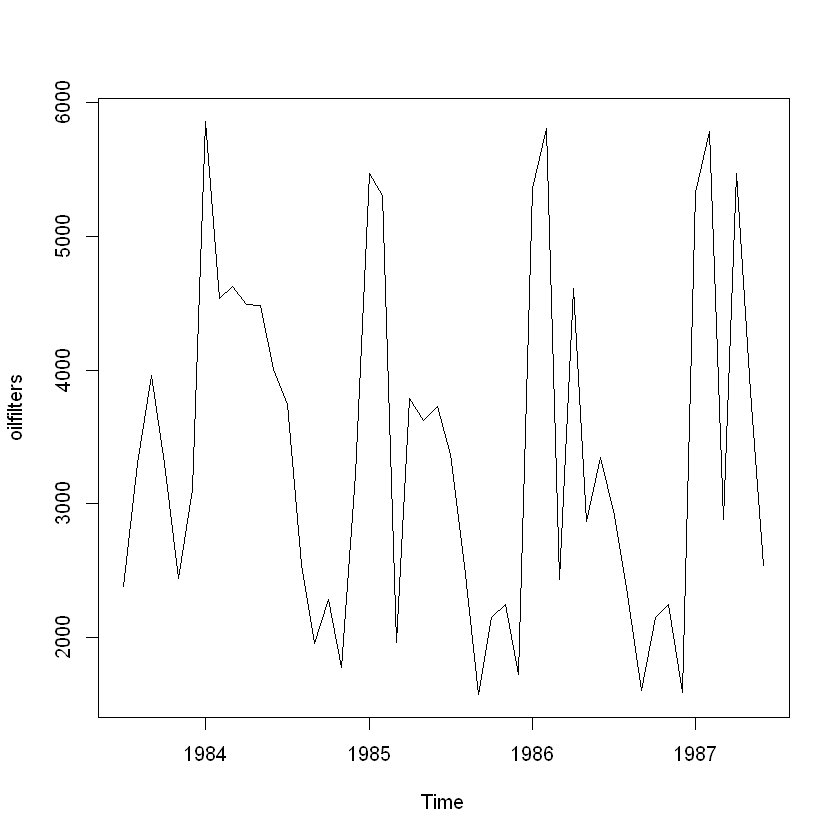

In [4]:
plot(oilfilters)

### Tendencia

Con un alfa de .10 NO se rechaza H0 por lo que no es significativo

Las variables no se relacionan, no muestran tendencia lineal.

In [7]:
Tend.OF <- lm(oilfilters~time(oilfilters))
summary(Tend.OF)


Call:
lm(formula = oilfilters ~ time(oilfilters))

Residuals:
    Min      1Q  Median      3Q     Max 
-1799.2 -1084.5  -228.7  1008.0  2528.7 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)      161664.99  324443.17   0.498    0.621
time(oilfilters)    -79.72     163.41  -0.488    0.628

Residual standard error: 1307 on 46 degrees of freedom
Multiple R-squared:  0.005147,	Adjusted R-squared:  -0.01648 
F-statistic: 0.238 on 1 and 46 DF,  p-value: 0.628


**Regresion lineal polinomica**

NO se rechaza H0 por lo que NO tiene tendencia polinomica.

In [13]:
Tiempo.OF <- as.numeric(time(oilfilters))
TendP.OF <- lm(oilfilters~poly(Tiempo.OF, degree = 4))
summary(TendP.OF)


Call:
lm(formula = oilfilters ~ poly(Tiempo.OF, degree = 4))

Residuals:
    Min      1Q  Median      3Q     Max 
-1861.5 -1143.0  -194.3   609.3  2862.4 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    3387.8      189.1  17.919   <2e-16 ***
poly(Tiempo.OF, degree = 4)1   -637.6     1309.9  -0.487    0.629    
poly(Tiempo.OF, degree = 4)2   1001.1     1309.9   0.764    0.449    
poly(Tiempo.OF, degree = 4)3   1693.8     1309.9   1.293    0.203    
poly(Tiempo.OF, degree = 4)4   -964.4     1309.9  -0.736    0.466    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1310 on 43 degrees of freedom
Multiple R-squared:  0.06593,	Adjusted R-squared:  -0.02096 
F-statistic: 0.7588 on 4 and 43 DF,  p-value: 0.5578


### Estacionariedad en varianza

Con alfa de 0.05 y 0.1 se rechaza H0

Por lo que la varianza es estacionaria con 90% y 95% de confianza.

In [19]:
adf.test(oilfilters, alternative = 'stationary')


	Augmented Dickey-Fuller Test

data:  oilfilters
Dickey-Fuller = -3.8077, Lag order = 3, p-value = 0.02584
alternative hypothesis: stationary


### Correlograma

**Completo**

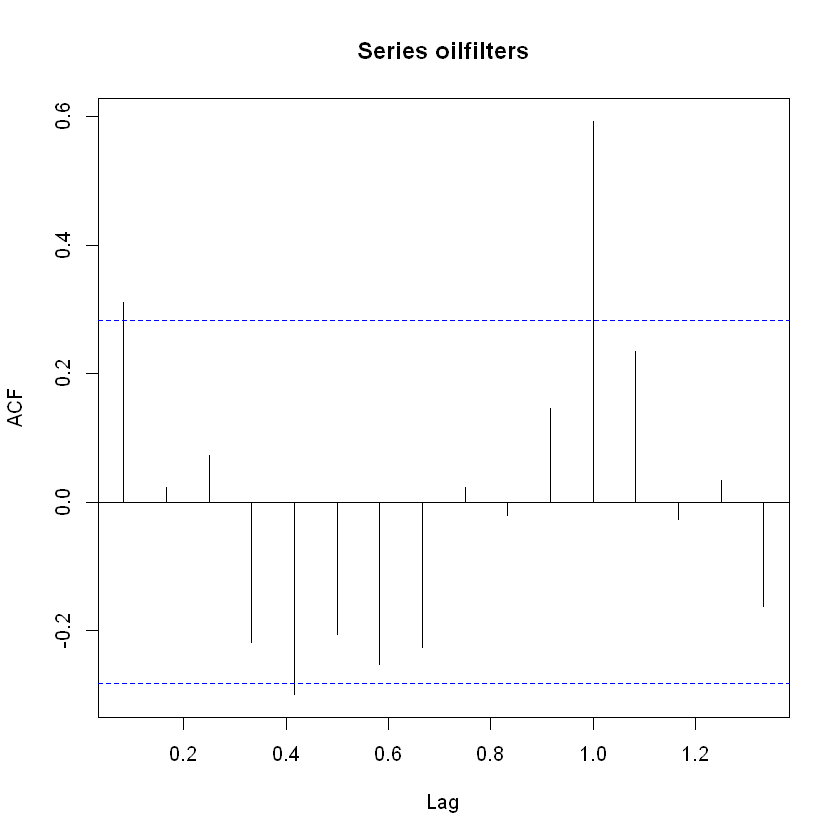

In [20]:
acf(oilfilters)

**Parcial**

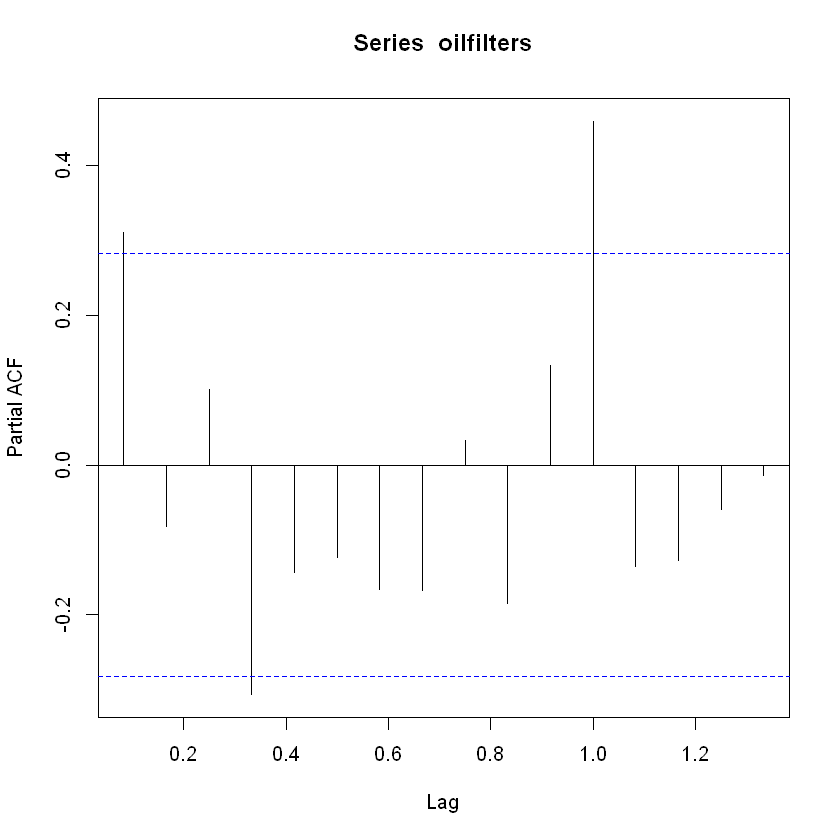

In [21]:
pacf(oilfilters)

### Modelo sugerido ARMA

**Prueba de AR**

Mejor AR = 12

AIC = 807.70

In [26]:
ar(oilfilters)
AIC(arima(oilfilters, order=c(12,0,0), method = 'ML'))


Call:
ar(x = oilfilters)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.2406  -0.1208   0.1008  -0.1728  -0.0677  -0.0755  -0.0054  -0.0996  
      9       10       11       12  
 0.0419  -0.1199  -0.0050   0.4588  

Order selected 12  sigma^2 estimated as  1237438

[1] 807.704

**Prueba de MA**

Mejor MA = 13

AIC = 819.31

In [24]:
aux <- Inf
for(i in 1:15){
    if(AIC(arima(oilfilters, order=c(0,0,i), method = 'ML')) < aux){
        aux <- AIC(arima(oilfilters, order=c(0,0,i), method = 'ML'))
        MA.mejor <- i
    }
}
MA.mejor
aux

[1] 13

[1] 819.3131

**Prueba de ARMA**

Mejor ARMA = 12, 6

AIC = 

In [38]:
arma.aic <- Inf
for(j in 1:10){
    for(i in 1:10){
        if(AIC(arima(oilfilters, order=c(j,0,i), method = 'ML')) < arma.aic){
            arma.aic <- AIC(arima(oilfilters, order=c(j,0,i), method = 'ML'))
            ARMA.mejor <- c(j,i)
        }
    }
}
ARMA.mejor
arma.aic

Warning message in log(s2):
"Se han producido NaNs"
Warning message in log(s2):
"Se han producido NaNs"
Warning message in log(s2):
"Se han producido NaNs"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave co

[1] 10  8

[1] 809.4045

### Modelo ARMA: Grafico

In [35]:
Prediccion.OF <- predict(arima(oilfilters, order = c(12,0,6), method = 'ML'), n.ahead = 30)$pred

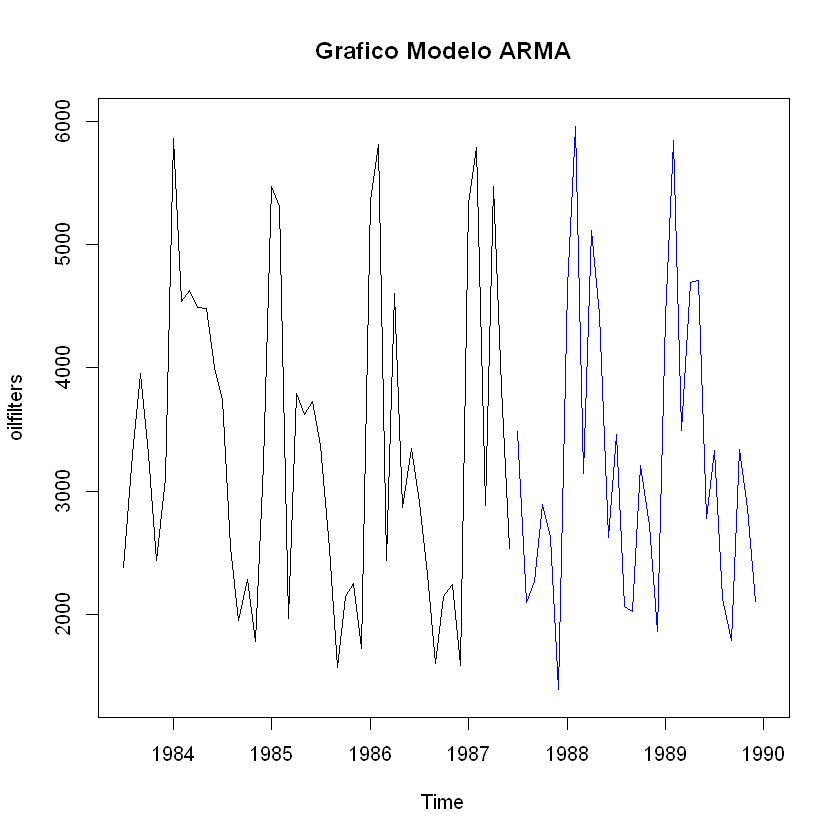

In [36]:
plot(oilfilters,
    xlim = c(1983.5, 1990),
    ylim = c(1350, 6001),
    main = 'Grafico Modelo ARMA')
lines(Prediccion.OF,
     col = 'blue')